# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [303]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('zillow_data.csv')

In [5]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Step 2: Data Preprocessing

In [15]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [14]:
df.columns.values[7:]

array(['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09',
       '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03',
       '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09',
       '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03',
       '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09',
       '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03',
       '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09',
       '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03',
       '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09',
       '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03',
       '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09',
       '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03',
       '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09',
       '2002-10', '2002-11', '2002-12', '2003-01', 

In [20]:
dt = get_datetimes(df)

In [24]:
dt

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [54]:
dt_df = df.copy()

In [55]:
df_dt.columns = ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', dt]

In [56]:
dt_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [57]:
dt_df.drop(columns=['RegionID','SizeRank'],inplace=True)

# Step 3: Reshape from Wide to Long Format

In [64]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
#    melted = melted.dropna(subset=['value'])
    return melted

In [67]:
df_melted = melt_data(dt_df)

In [180]:
df_melted.dropna(axis=0,inplace=True)

In [183]:
df_melted.drop(columns='Metro',axis=1, inplace=True)

In [72]:
df_melted.set_index('time',inplace=True)

In [185]:
df_melted.shape

(3508681, 5)

In [74]:
df_melted.head(2)

,RegionName,City,State,Metro,CountyName,value
time,,,,,,
1996-04-01,60657,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0


In [186]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3508681 entries, 1996-04-01 to 2018-04-01
Data columns (total 5 columns):
RegionName    int64
City          object
State         object
CountyName    object
value         float64
dtypes: float64(1), int64(1), object(3)
memory usage: 160.6+ MB


In [415]:
df_melted.groupby('RegionName')

In [ ]:
df_melted_265 = df_melted.groupby('RegionName')

In [405]:
df_melted.groupby('RegionName').mean().sort_values('value', ascending=False).head(30)

,value
RegionName,
10021,1.285427e+07
10011,7.755844e+06
10014,6.836902e+06
10128,5.085436e+06
94027,3.487129e+06
81611,3.147124e+06
90210,2.789977e+06
33480,2.634498e+06
94123,2.630977e+06


### ZIP code analysis

In [416]:
top_10 = [10011, 94027, 81611, 90210, 33480, 94123, 31561, 90402, 7620, 11976]

In [417]:
Atherton CA ,Aspen, Beverly Hills, Palm Beach County Florida, San Francisco California, Glynn County Georgia, santa monica, NJ, Brooklyn

SyntaxError: invalid syntax (<ipython-input-417-a24ccfab983a>, line 1)

In [418]:
df_zip=df_melted.groupby(['RegionName','time']).mean()

In [419]:
def zipper(df,zips):
    df_dict={}
    for z in zips:
        df_dict.update({z : df_zip.xs(z, level='RegionName')})
    return df_dict

In [420]:
zips_10 = zipper(df_zip, top_10)

In [421]:
#create a function to calculate the monthly return of each houses
def return_gen(df):
    iter_df = pd.DataFrame(np.zeros([len(df),1]),columns=['mr'])
    iter_df.index = df.index
    iter_df.iloc[0]['mr'] = 0
    for i in range(len(df['value'])):
        if i+1 < len(df['value']):
            #monthly return in %
            iter_df.iloc[i+1]['mr']= ((df.iloc[i+1]['value']/df.iloc[i]['value'])-1)
        else:
            break
    return iter_df

In [422]:
zips_10_mr = {}
for k,v in zips_10.items():
    zips_10_mr.update({k: return_gen(v)})

In [424]:
zips_10_mr[11976]

,mr
time,
1996-04-01,0.000000
1996-05-01,0.006750
1996-06-01,0.007450
1996-07-01,0.007888
1996-08-01,0.009049
1996-09-01,0.009937
1996-10-01,0.011279
1996-11-01,0.012340
1996-12-01,0.015237


In [191]:
df_stateval=df_melted.groupby(['State','time'])['value'].mean()

# Step 4: EDA and Visualization
Perform basic EDA as you would building any model, then create at least 3 visualizations.  At least one of the visualizations should have time on the x-axis.  Axes should be labeled and any text should be legible.

In [413]:
def check_stationarity(df):
    index =np.array(df.index)
    passe= np.array(df['mr'])
    ts = pd.Series(passe, index=index)
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(ts)
    # Collect and package the code from previous lab
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return print(dfoutput)

In [353]:
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

#matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [348]:
# Draw a line plot using temp and .plot() function. 


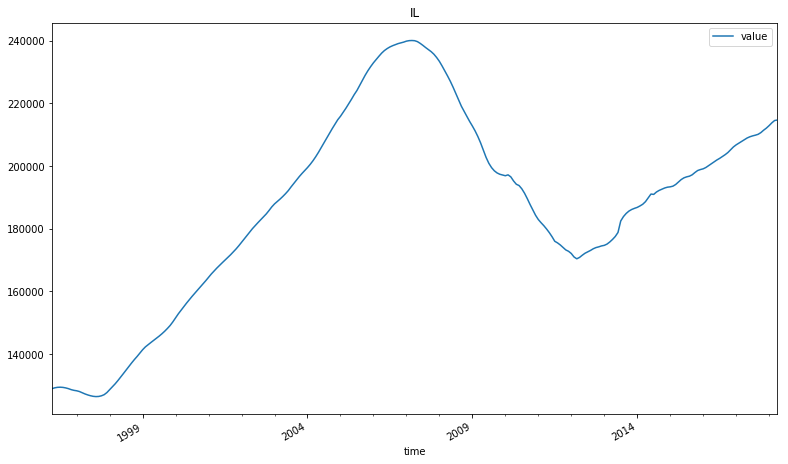

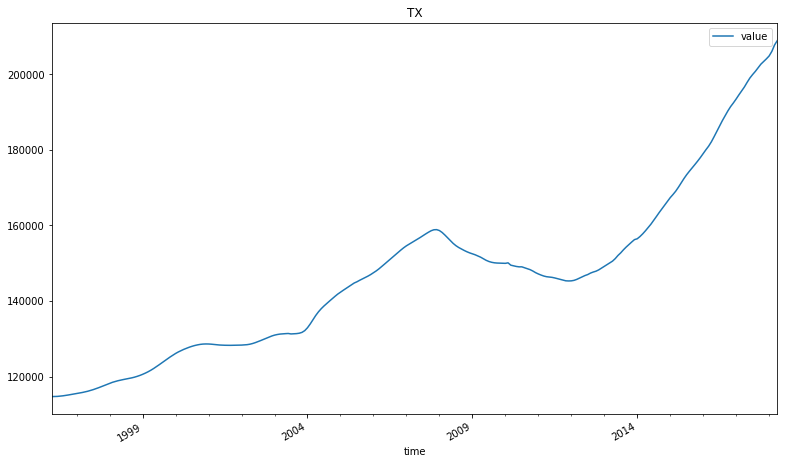

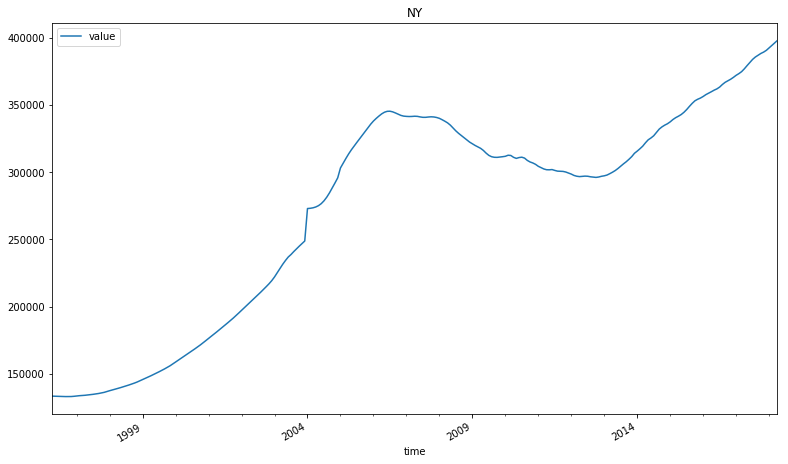

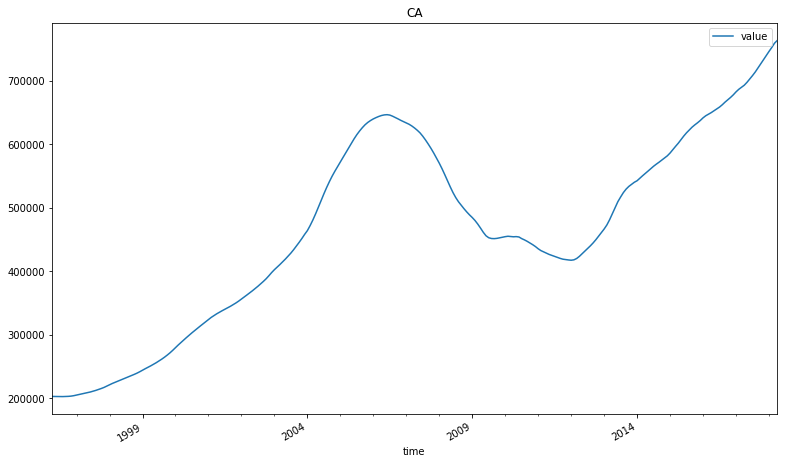

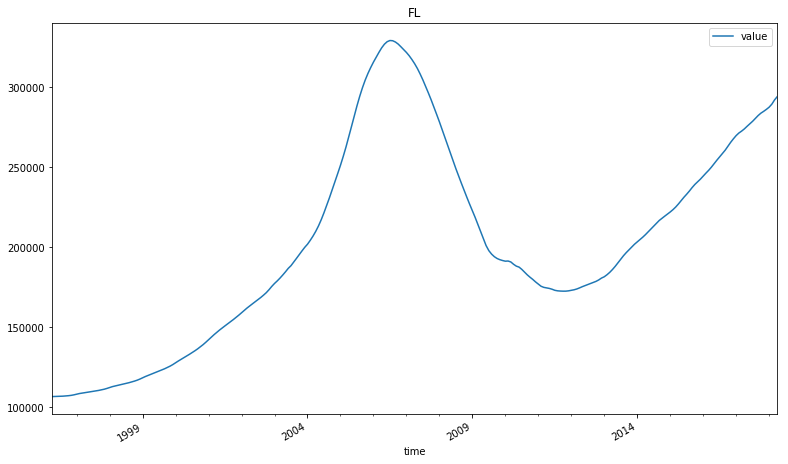

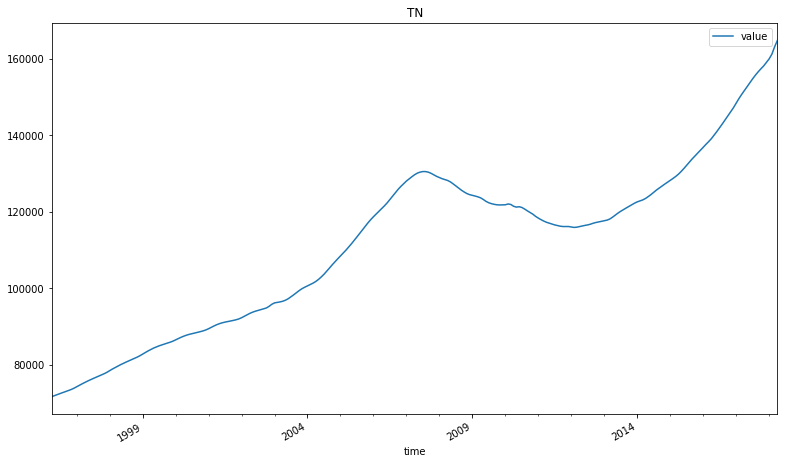

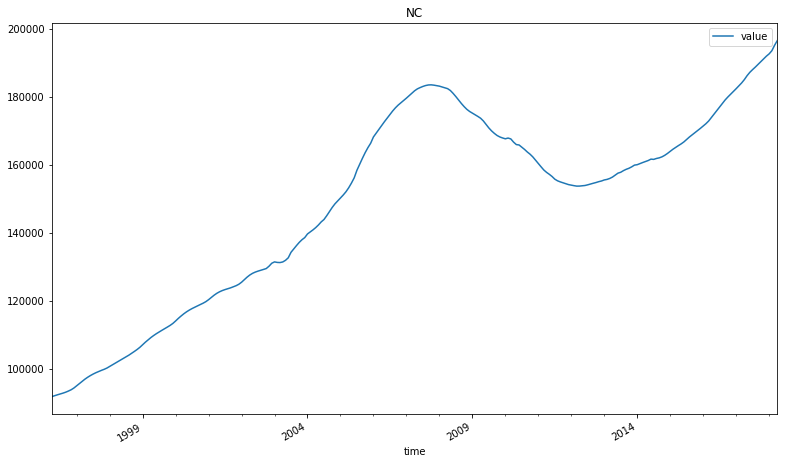

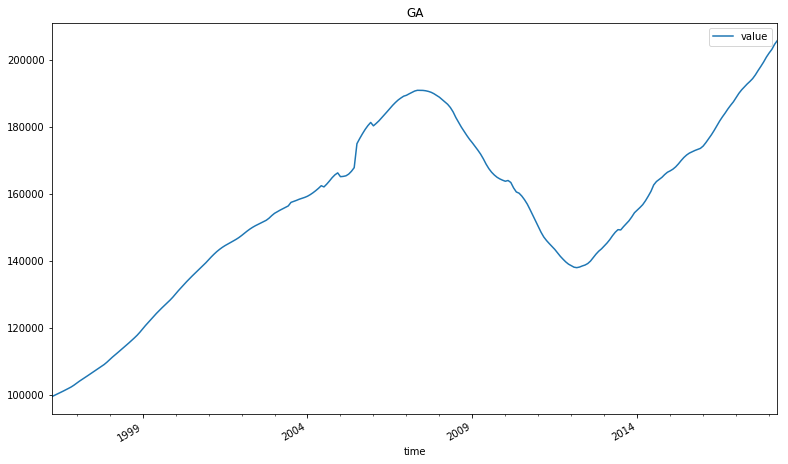

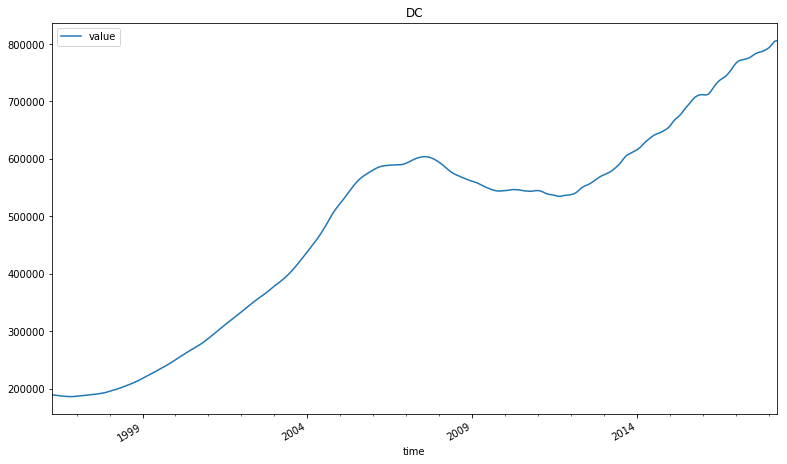

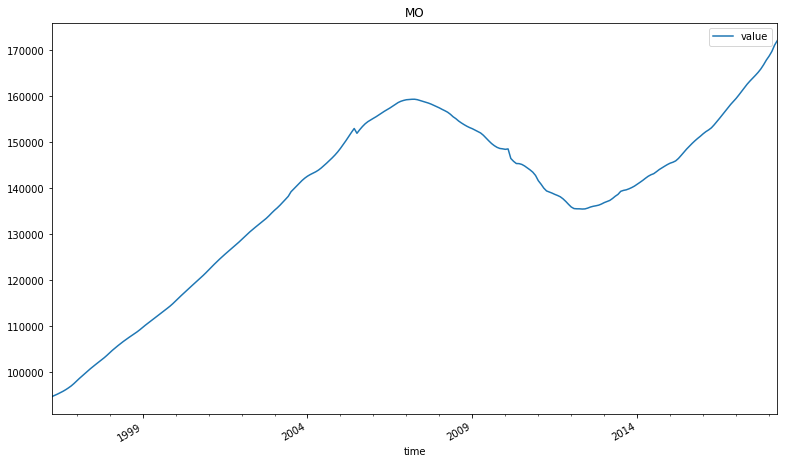

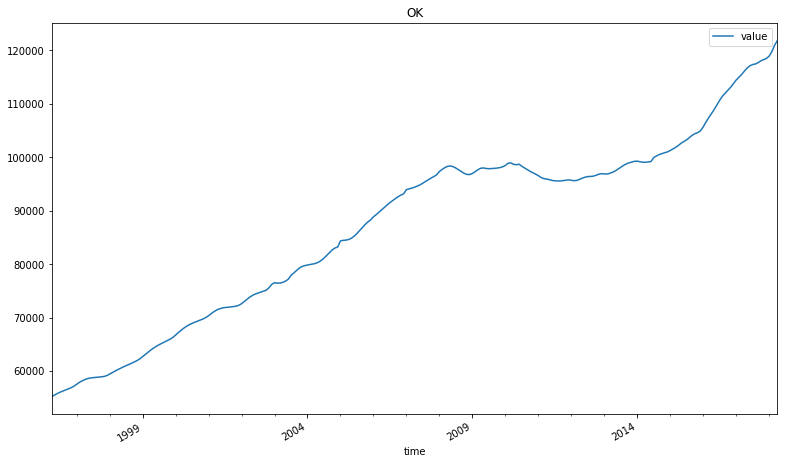

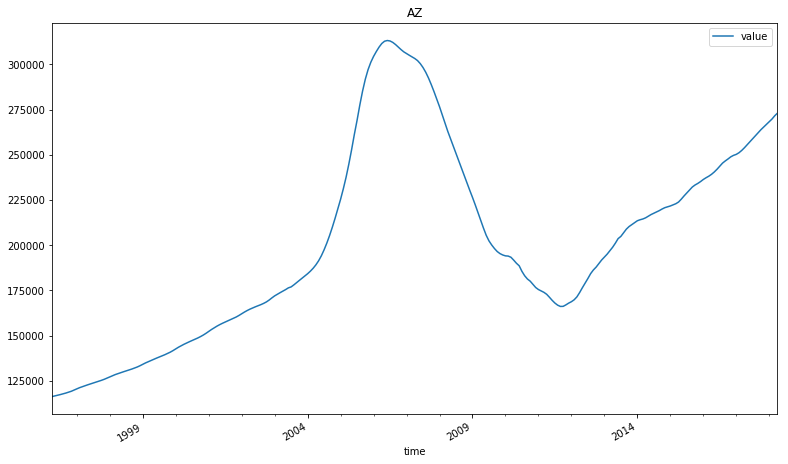

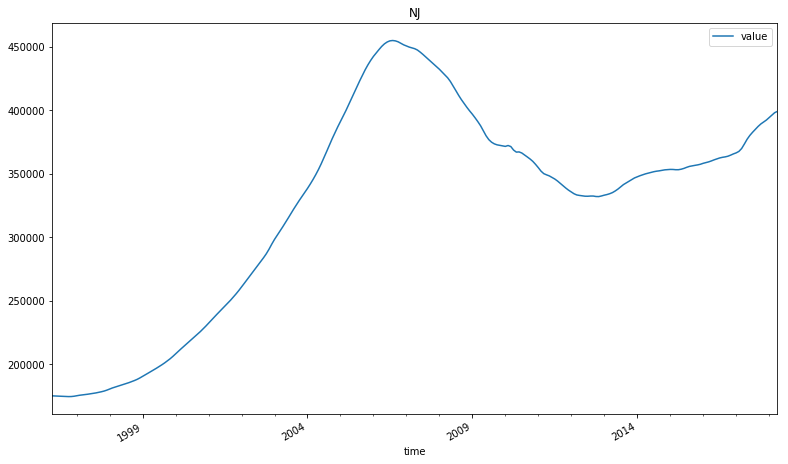

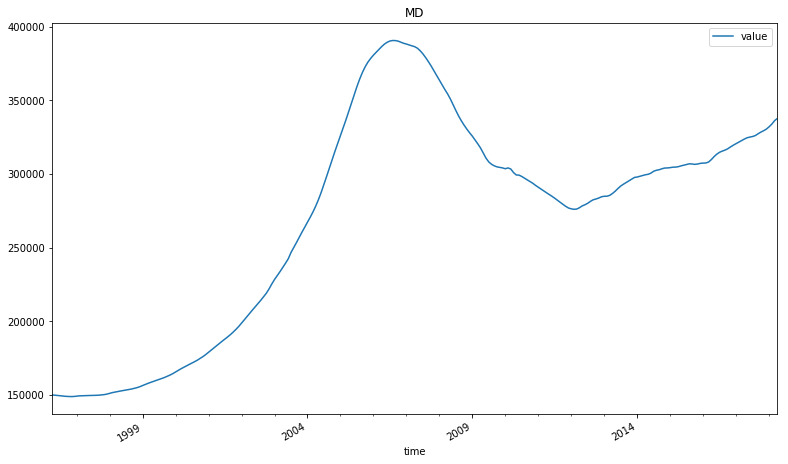

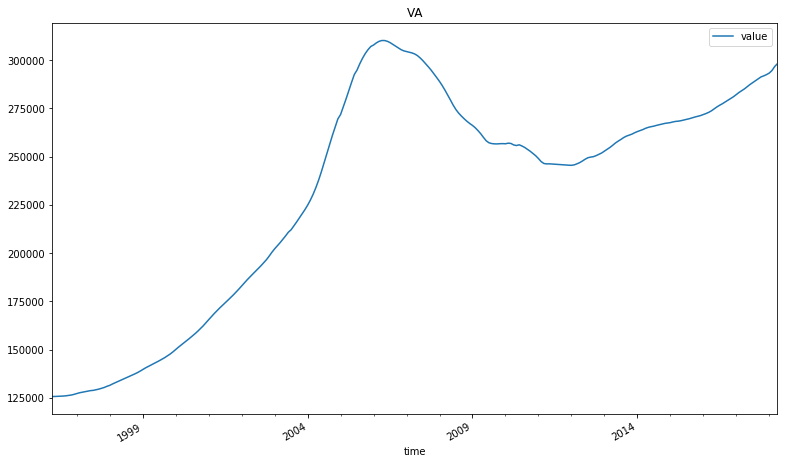

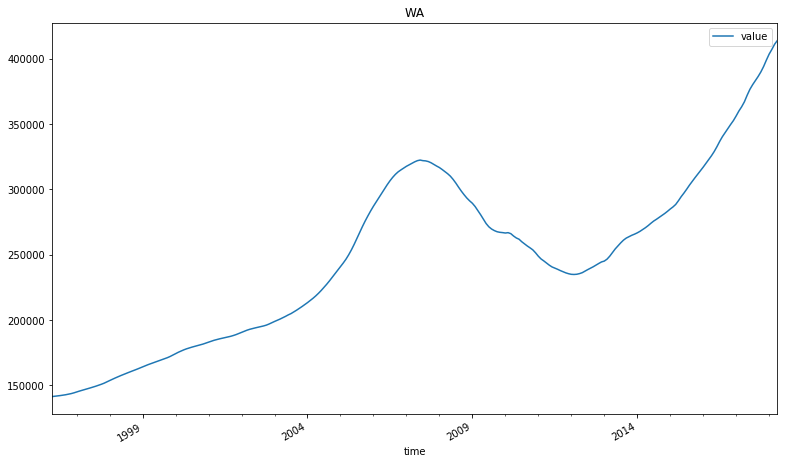

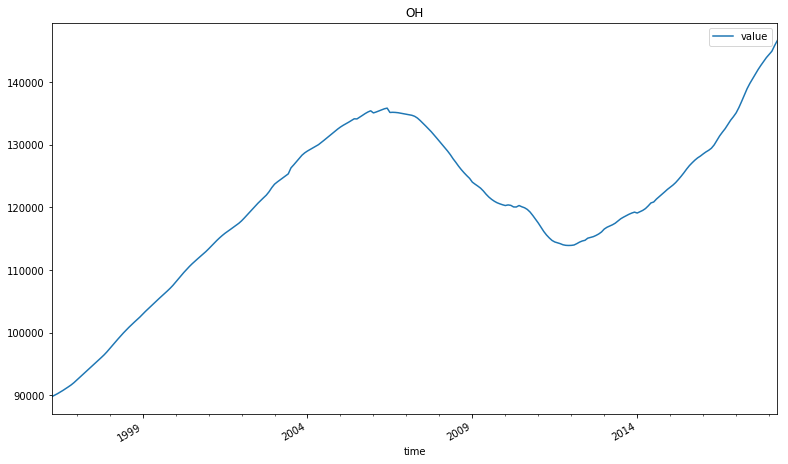

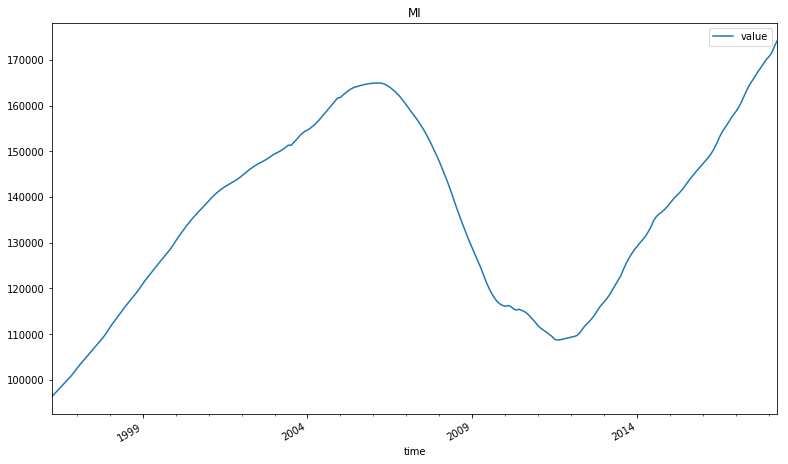

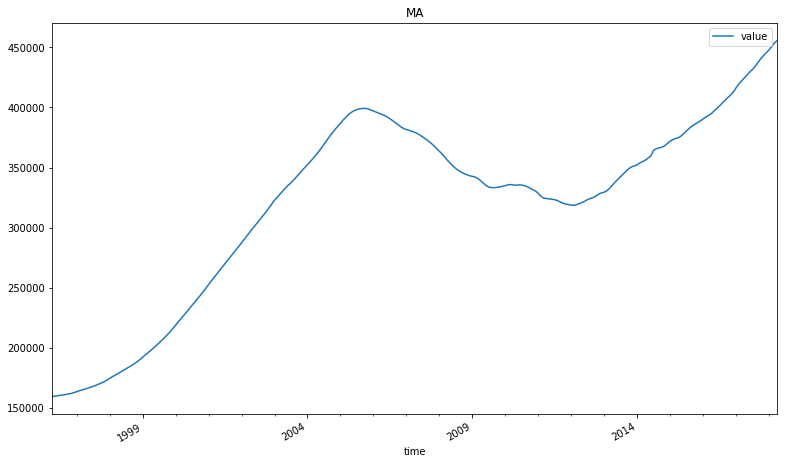

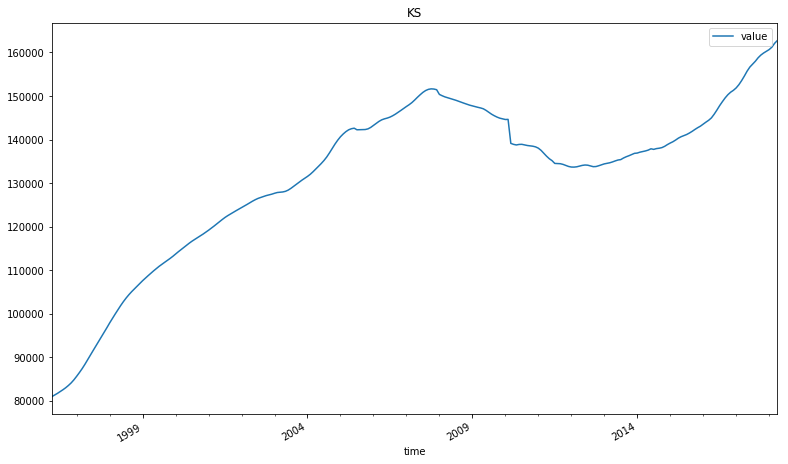

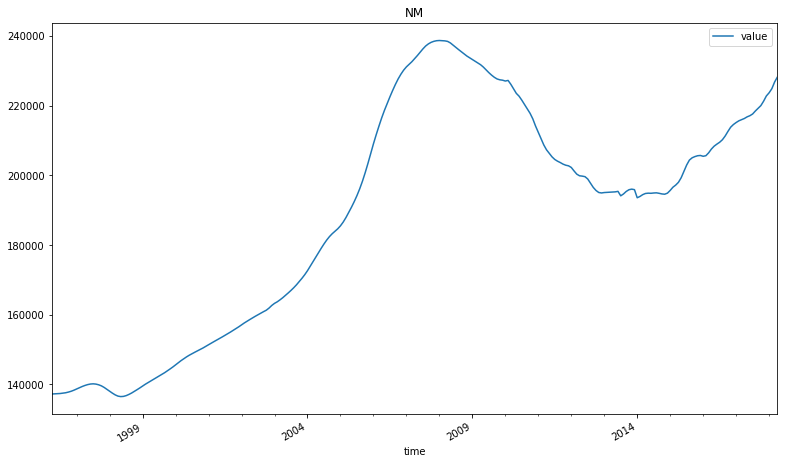

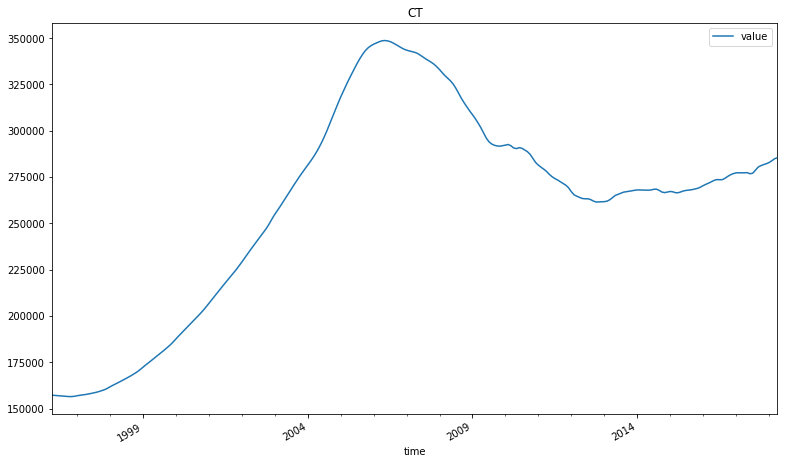

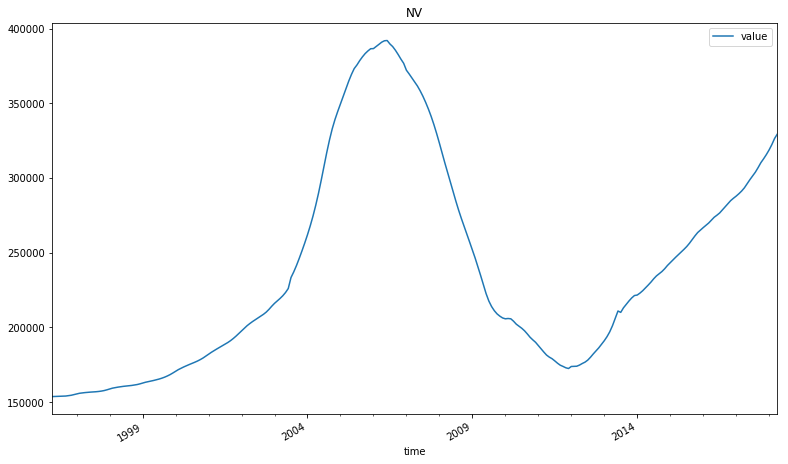

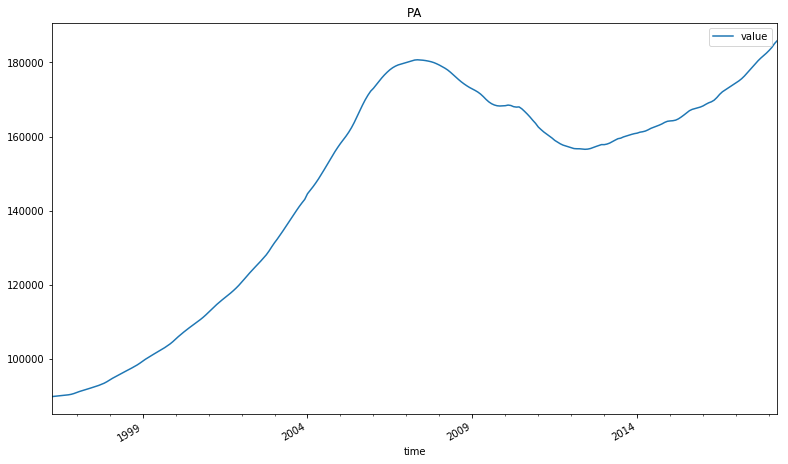

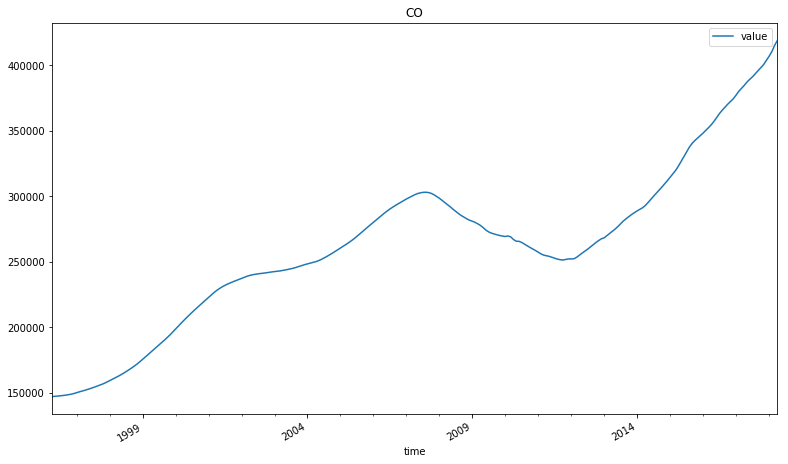

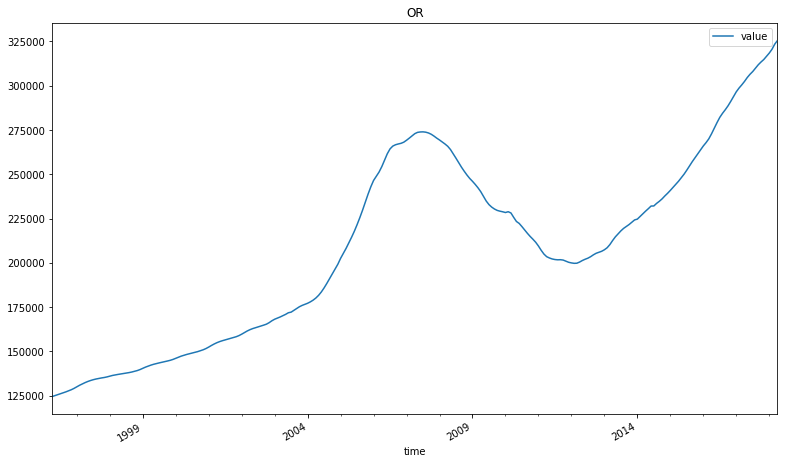

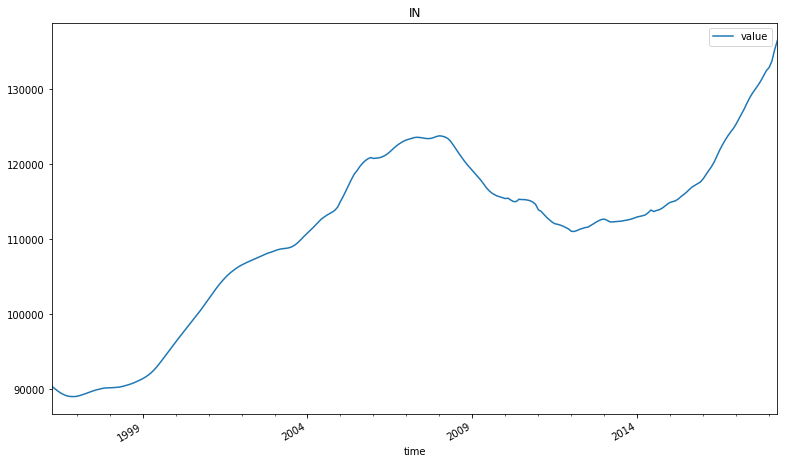

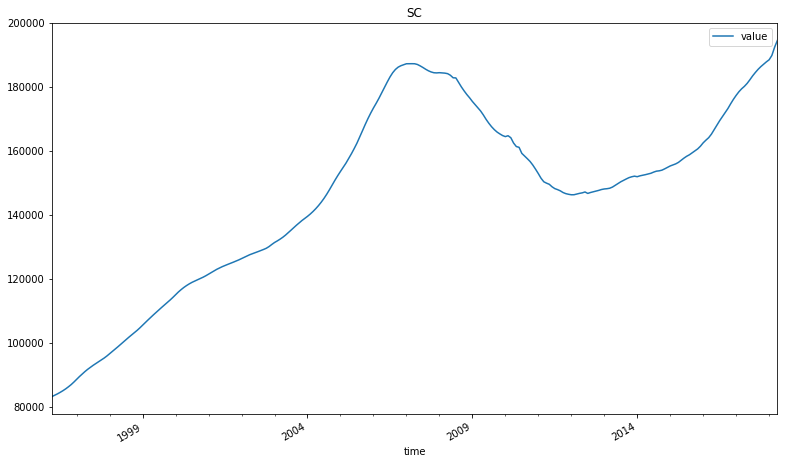

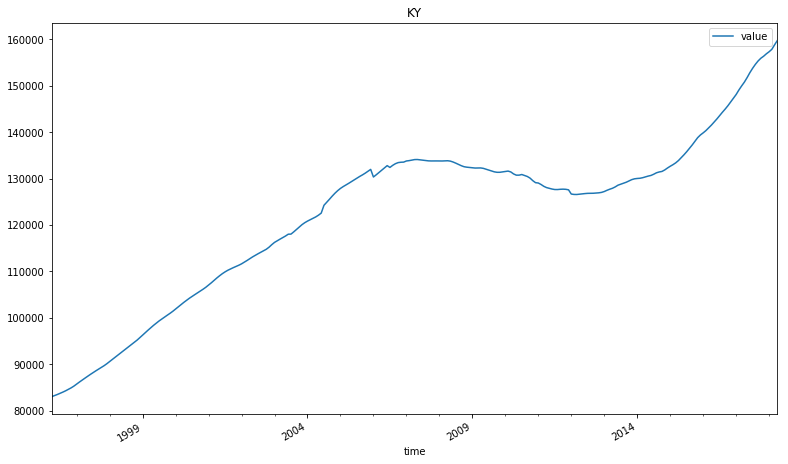

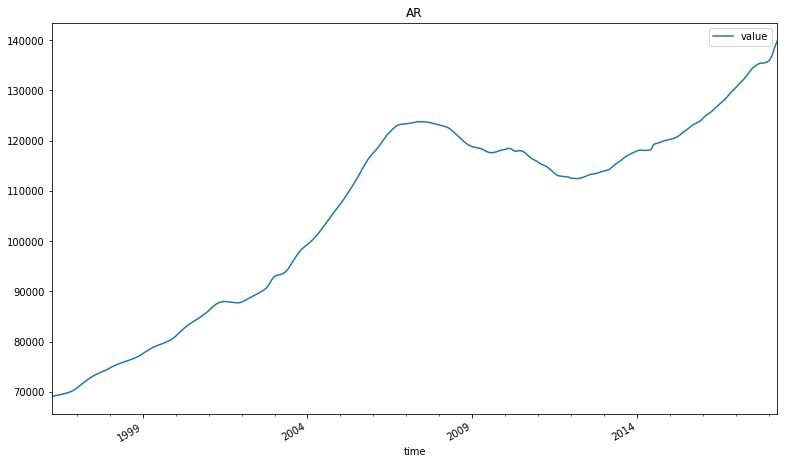

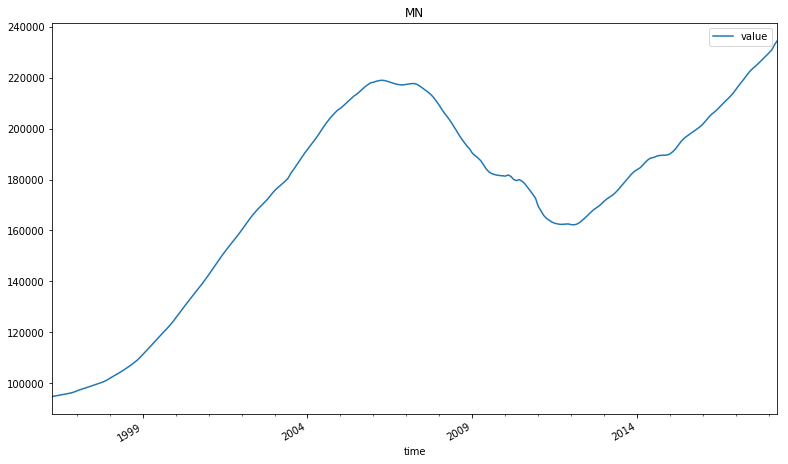

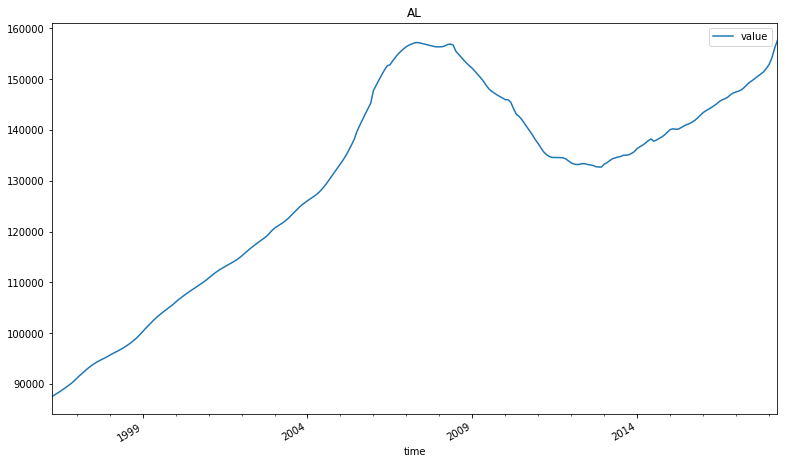

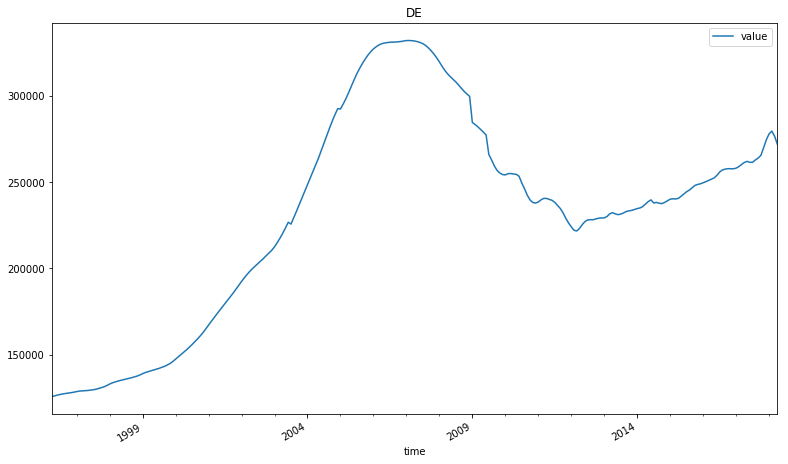

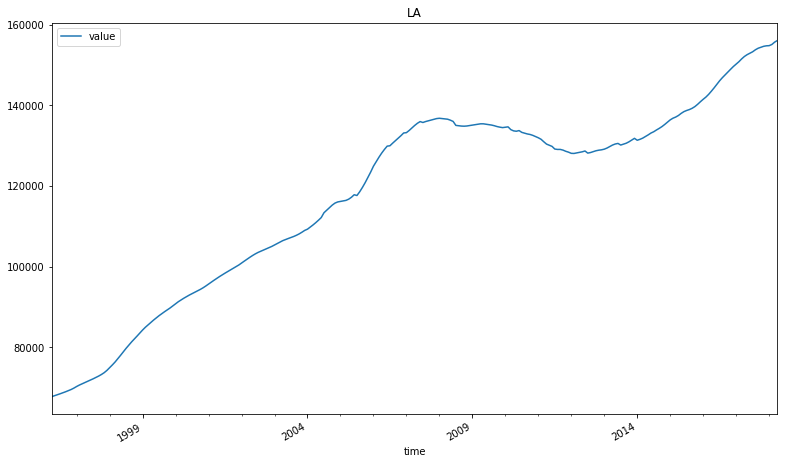

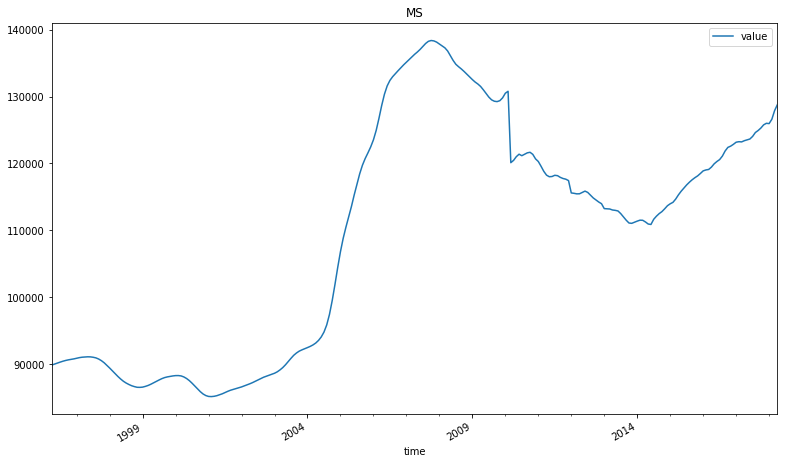

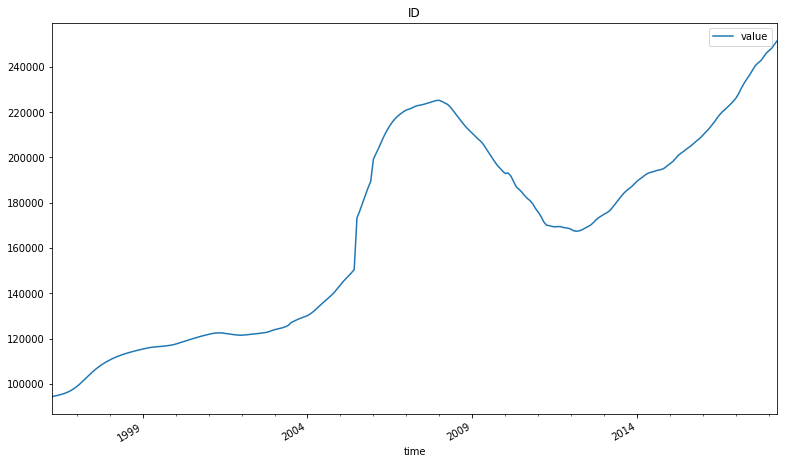

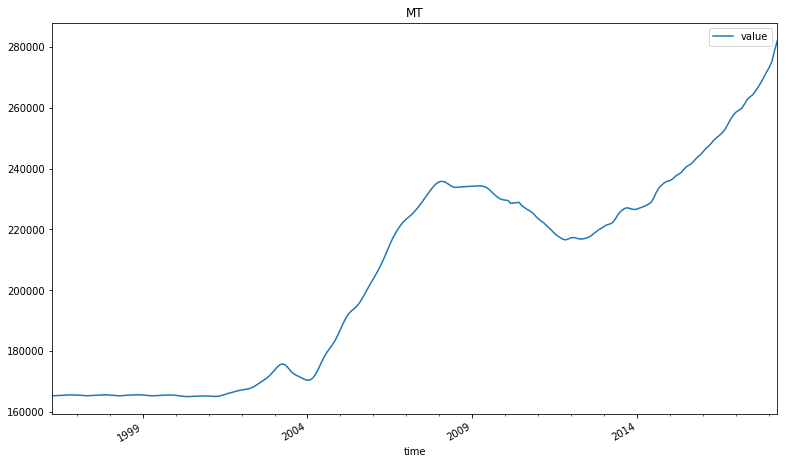

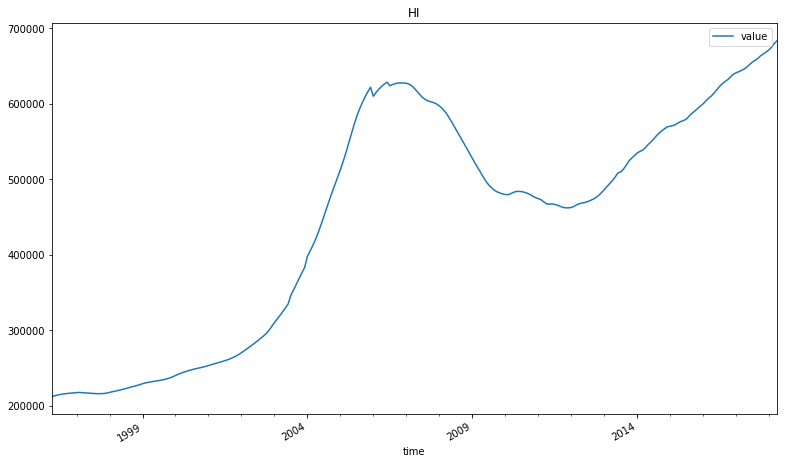

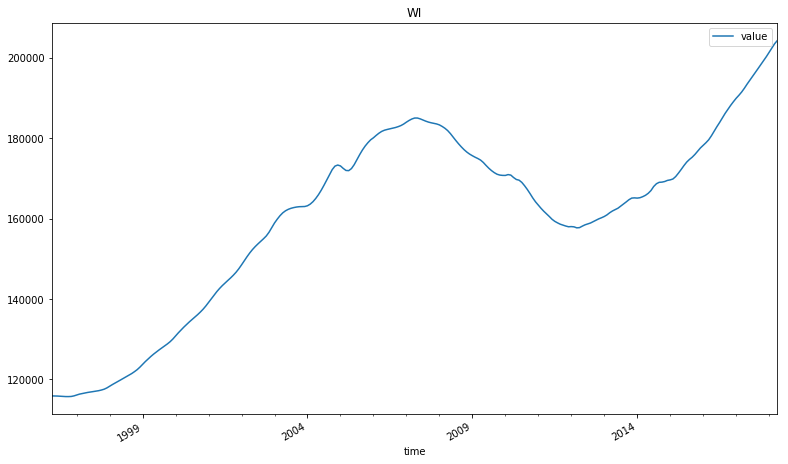

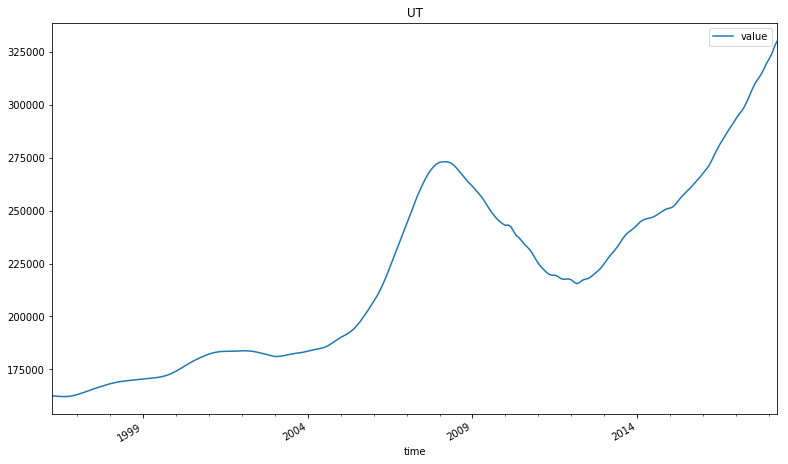

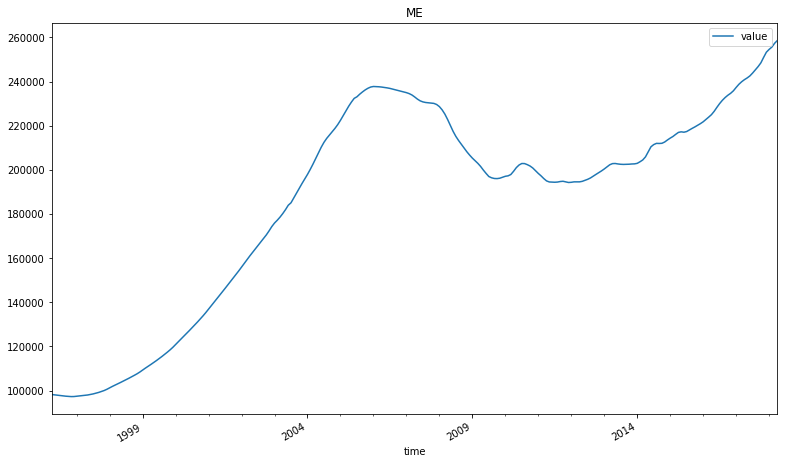

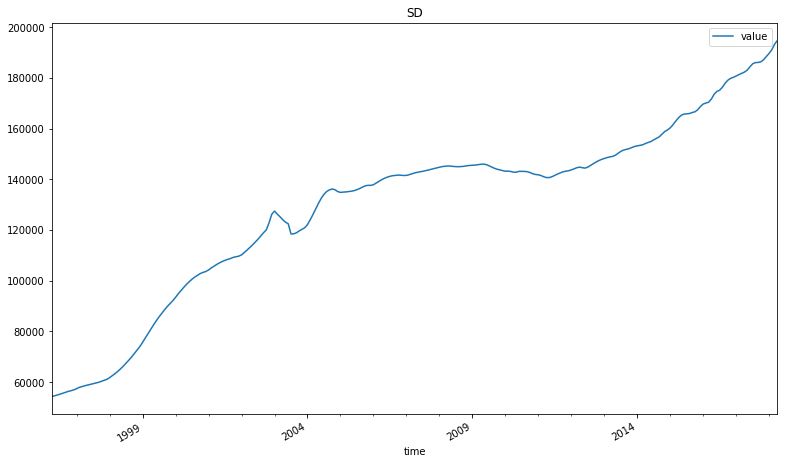

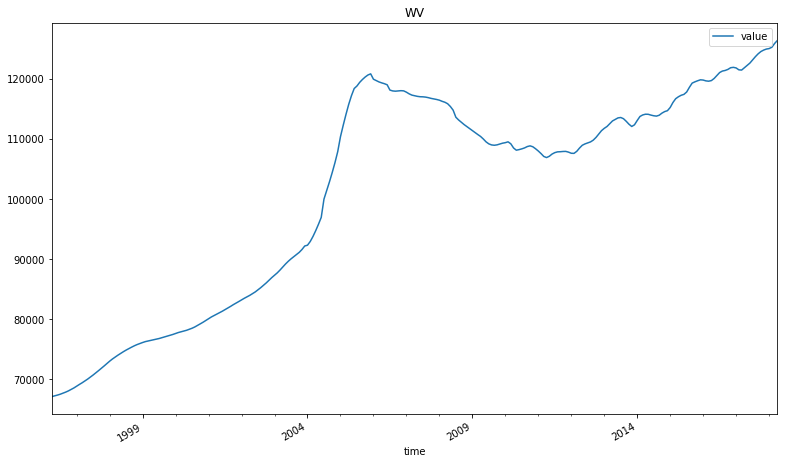

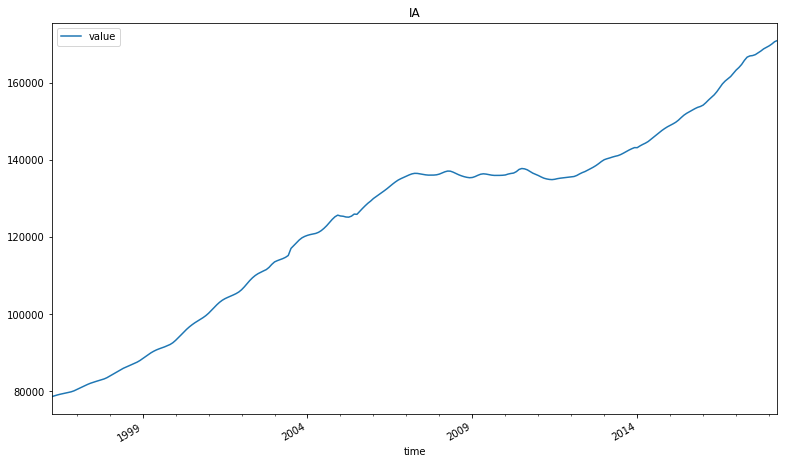

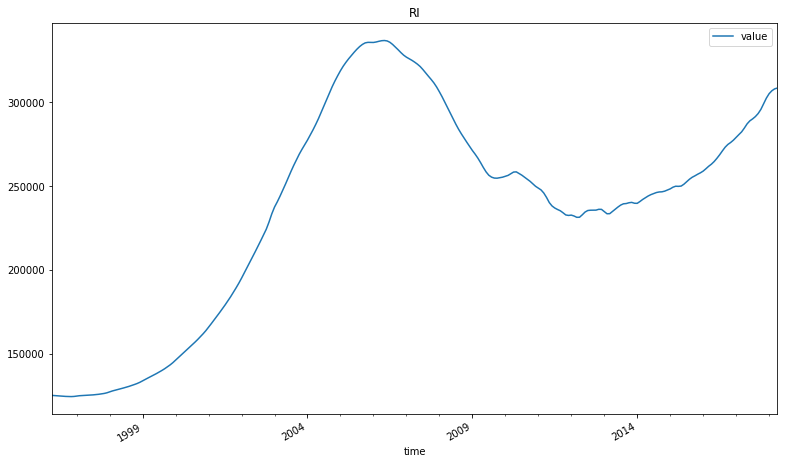

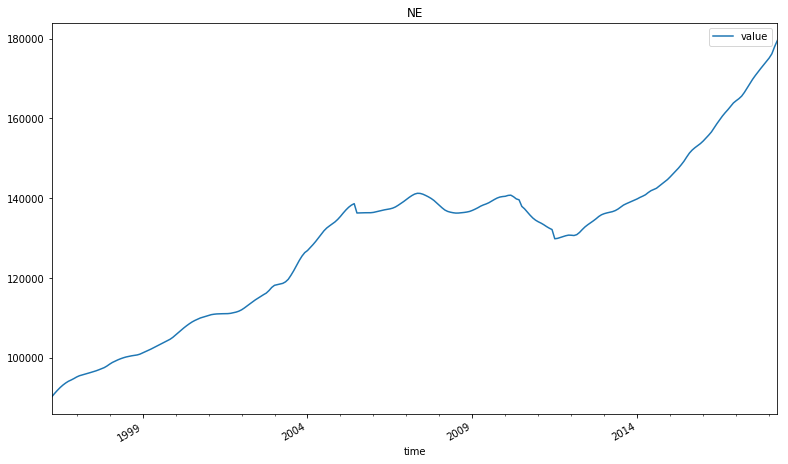

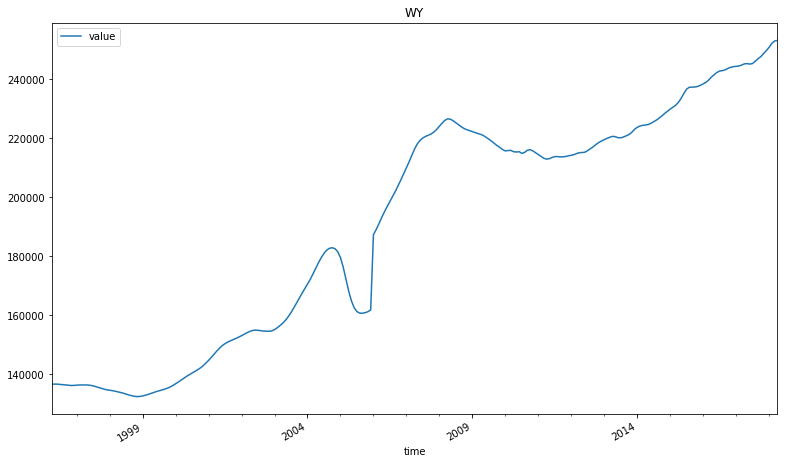

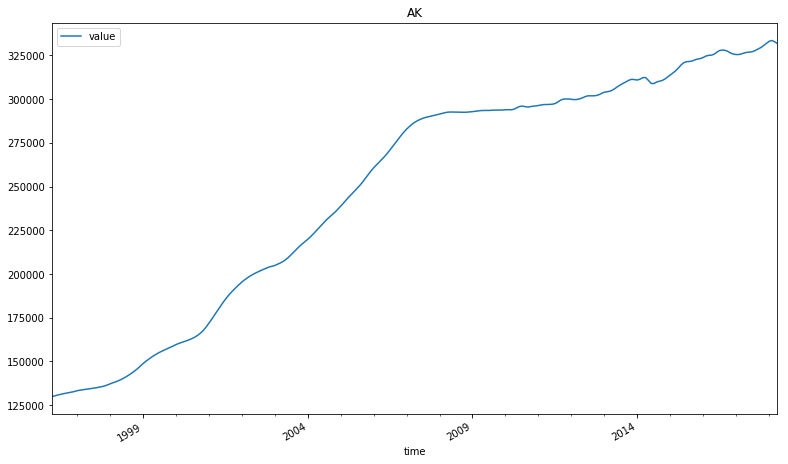

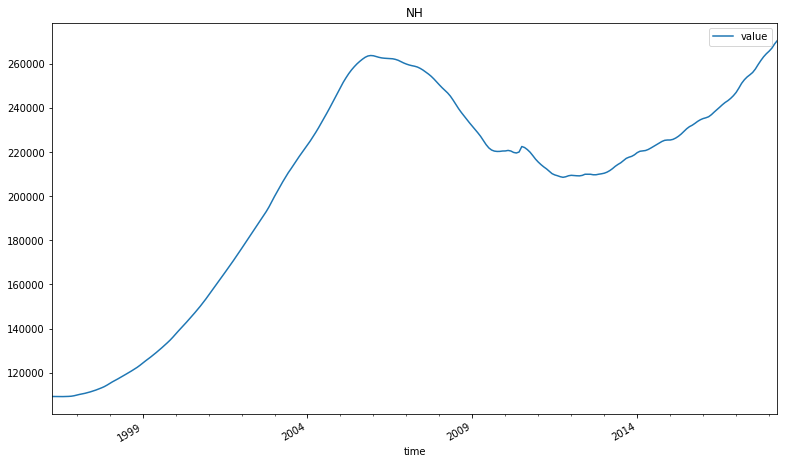

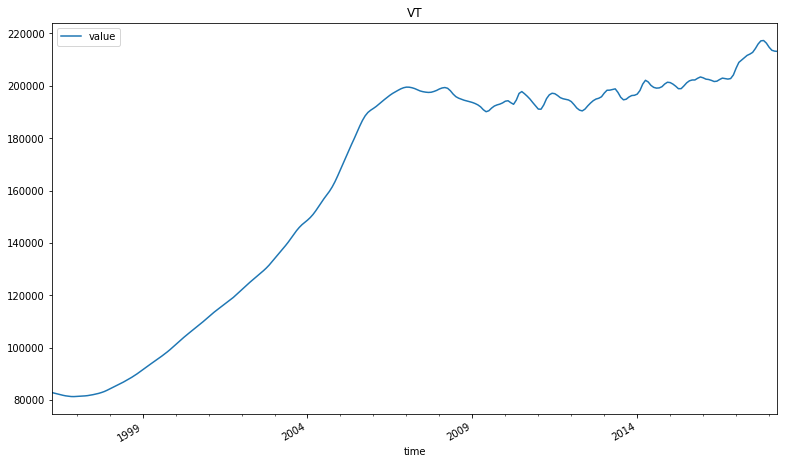

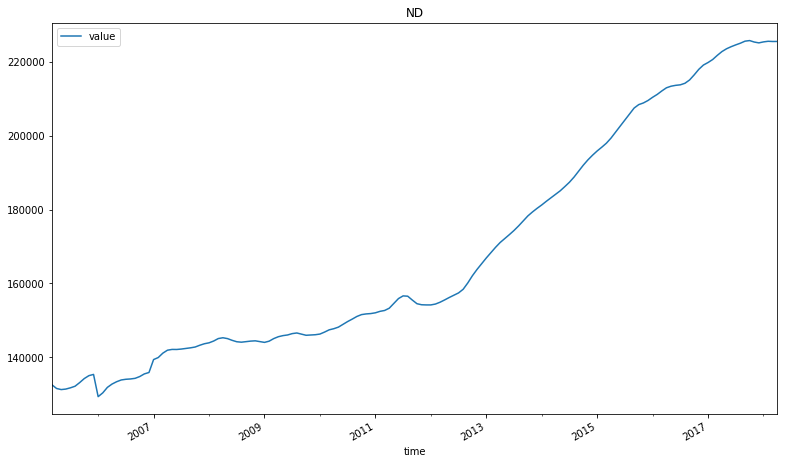

In [349]:
for state in list(df_melted.State.unique()):
    df_stateval.xs(state, level='State').plot(figsize = (13,8), subplots=True, legend=True)
    plt.title(state)
    plt.show()

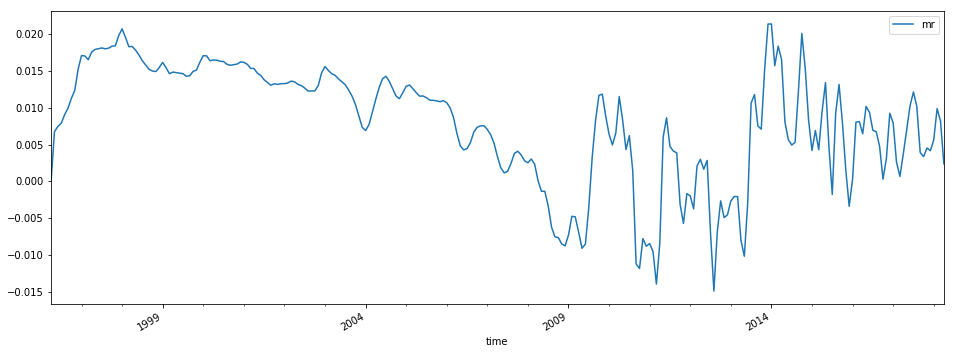

In [425]:
zips_10_mr[11976].plot(figsize = (16,6))
plt.gcf().autofmt_xdate()

In [426]:
check_stationarity(zips_10_mr[11976])

Test Statistic                  -1.583083
p-value                          0.492086
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [427]:
data=zips_10_mr[11976].copy()

In [428]:
rolmean = zips_10_mr[11976].rolling(window = 7, center = False).mean()
rolstd = zips_10_mr[11976].rolling(window = 7, center = False).std()

In [429]:
data_minus_rolmean = data - rolmean

In [430]:
data_minus_rolmean.dropna(axis=0, inplace=True)

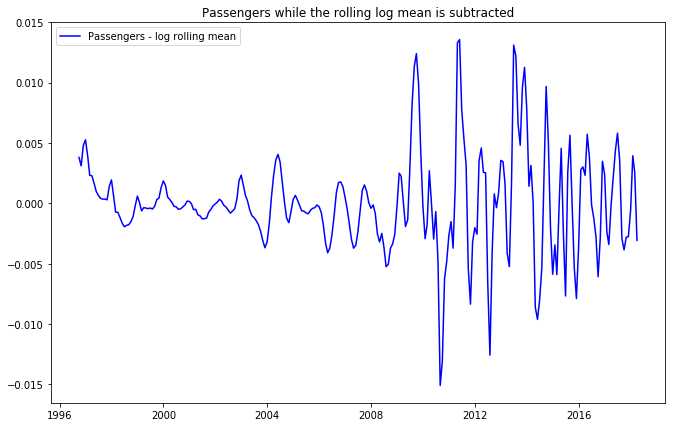

In [431]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Passengers - log rolling mean')
plt.legend(loc='best')
plt.title('Passengers while the rolling log mean is subtracted')
plt.show(block=False)

In [459]:
data1 = data_minus_rolmean.copy()

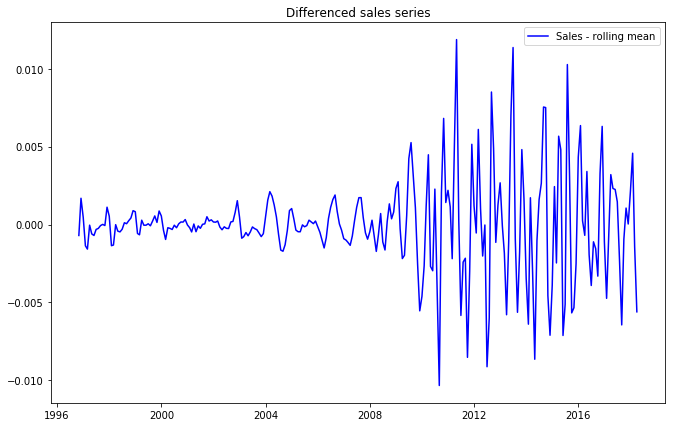

In [460]:
data_diff = data1.diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [463]:
data_diff.dropna(axis=0, inplace=True)

In [464]:
check_stationarity(data_diff)

Test Statistic                -7.013159e+00
p-value                        6.838864e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13ee200b8>]],
      dtype=object)

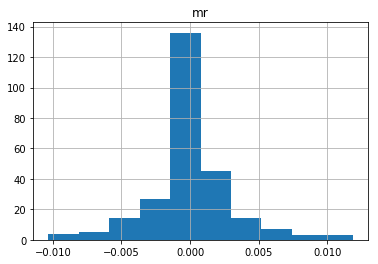

In [465]:
data_diff.hist()

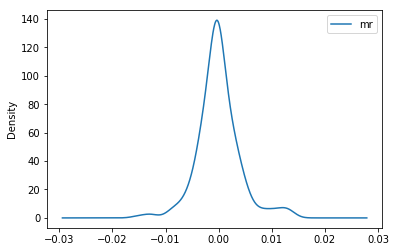

In [466]:
data_minus_rolmean.plot(kind='kde')

# Step 5: ARIMA Modeling
Be sure to validate your model.  Make a forecast for the future and describe the trend.

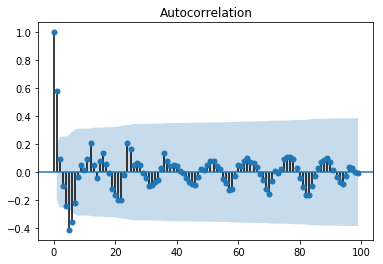

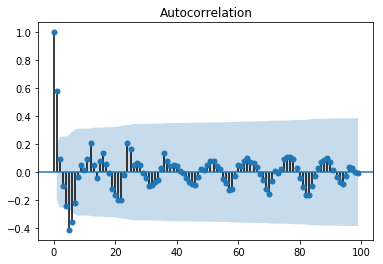

In [467]:
#Correlation
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf
#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(data_diff[:100], alpha=.05)

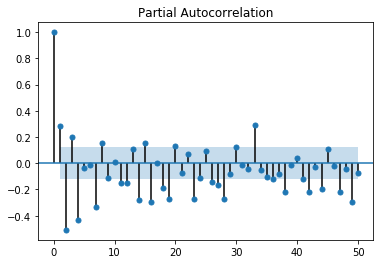

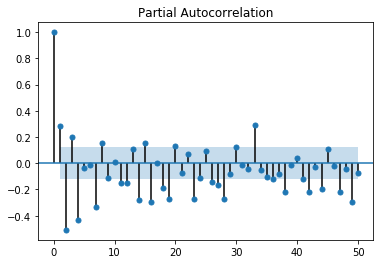

In [468]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_diff, alpha=.05, lags=50)

In [474]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model
#pAR,dI,qMA
model = ARIMA(data_minus_rolmean, order=(4,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                     mr   No. Observations:                  259
Model:                     ARMA(4, 1)   Log Likelihood                1232.147
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 05 Sep 2019   AIC                          -2450.293
Time:                        11:15:04   BIC                          -2425.395
Sample:                    10-01-1996   HQIC                         -2440.283
                         - 04-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.159e-05      0.000     -0.118      0.906      -0.001       0.001
ar.L1.mr       1.0440      0.091     11.509      0.000       0.866       1.222
ar.L2.mr      -0.7837      0.121     -6.492      0.0

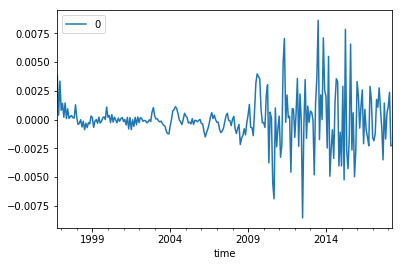

In [479]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

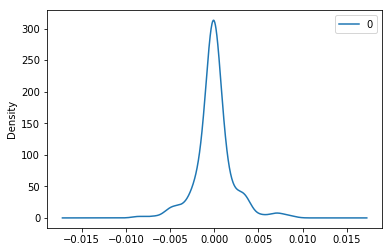

In [481]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.show()

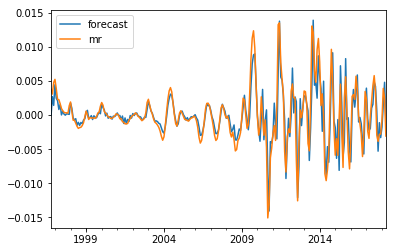

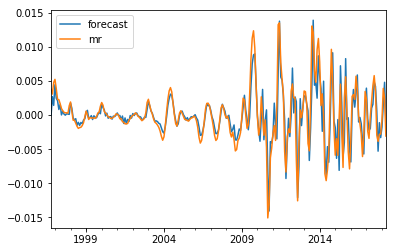

In [482]:
model_fit.plot_predict()

In [484]:
model_fit.forecast(266)[0]

array([-3.66975896e-03, -1.28303220e-03, -9.90953223e-04, -1.11916289e-03,
        3.43255619e-05,  7.46832458e-04,  4.23037606e-04,  2.08504032e-04,
        2.69765206e-04,  9.65327171e-05, -1.49248108e-04, -1.68184042e-04,
       -1.11022126e-04, -1.18394813e-04, -1.03708869e-04, -4.48266555e-05,
       -1.70356702e-05, -2.36720395e-05, -2.42835835e-05, -2.28855416e-05,
       -3.34238261e-05, -4.37633834e-05, -4.53281508e-05, -4.51601458e-05,
       -4.61755916e-05, -4.49682847e-05, -4.23238311e-05, -4.11269328e-05,
       -4.09575075e-05, -4.06299718e-05, -4.05914092e-05, -4.10920802e-05,
       -4.15164571e-05, -4.16492416e-05, -4.17458611e-05, -4.18203340e-05,
       -4.17620141e-05, -4.16545009e-05, -4.15988231e-05, -4.15689803e-05,
       -4.15401184e-05, -4.15364093e-05, -4.15561675e-05, -4.15730896e-05,
       -4.15823347e-05, -4.15908835e-05, -4.15957252e-05, -4.15938702e-05,
       -4.15899693e-05, -4.15873397e-05, -4.15850893e-05, -4.15832182e-05,
       -4.15827997e-05, -

# Step 6: Interpreting Results
Give a detailed interpretation of results including the relationship between the inputs and output of the model.